<a href="https://colab.research.google.com/github/fellowship/Fridge-Food-Type/blob/master/Custom_A_Dataframe_from_Image_URL_FastAI_RESNET34_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook implements custom Dataset A with RESNET34/50:
Dataset A: https://drive.google.com/drive/folders/1FqMl-O78MZgFT_tGruad4t1yti-scO4B?usp=sharing

##Quickstats for Dataset A:
1. 8 in-oven food categories
2. Accuracy: RESNET 34: 45%; RESNET 50: 58%

# 1. Import dependencies

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 13.0MB/s 
     |████████████████████████████████| 194kB 19.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.2MB 43.5MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 40.7MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

In [ ]:
# Print Working Directory 
!pwd

/content


In [ ]:
# current working directory path
wd = os.getcwd() 

### Download Data and Create Dataframe

In [ ]:
# extract image_urls and label_names
import os
image_urls = []
labels_dist = []

path = '/content/gdrive/MyDrive/Dataset/Dataset1/Images'

for subdir, dirs, files in os.walk(path):
  for f in files:
    if(f!='.DS_Store'):
      image = os.path.join(path, subdir, f)
      image_urls.append(image)
      f = f.split('.')[-2]
      stemmed = ''.join([i for i in f if not i.isdigit()])
      stemmed = stemmed.replace('()','')
      stemmed = stemmed.strip()
      labels_dist.append(stemmed)

print(f'# of images: {len(image_urls)}')
print(f'# of labels: {len(labels_dist)}')

# of images: 240
# of labels: 240


In [ ]:
food_labels = sorted(list(set(labels_dist)))

In [ ]:
# store urls and raw labels in dataframe
import pandas as pd
df = pd.DataFrame(list(zip(image_urls,labels_dist)), columns = ['image_urls', 'labels_dist'])

In [ ]:
df.head()

,image_urls,labels_dist
0,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes0.jpg,potatoes
1,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes11.jpg,potatoes
2,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes8.jpg,potatoes
3,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes2.jpg,potatoes
4,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes15.jpg,potatoes


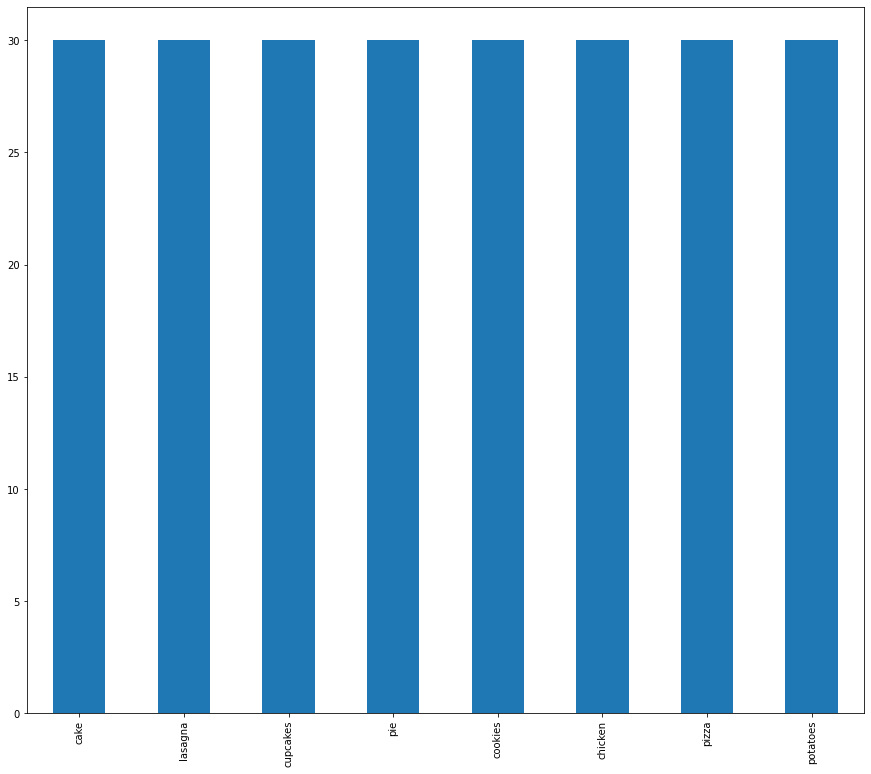

In [ ]:
df['labels_dist'].value_counts().plot(kind='bar',figsize=(15,13))

In [ ]:
df.head()

,image_urls,labels_dist
0,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes0.jpg,potatoes
1,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes11.jpg,potatoes
2,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes8.jpg,potatoes
3,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes2.jpg,potatoes
4,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes15.jpg,potatoes


In [ ]:
df

,image_urls,labels_dist
0,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes0.jpg,potatoes
1,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes11.jpg,potatoes
2,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes8.jpg,potatoes
3,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes2.jpg,potatoes
4,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Train/Potatoes/potatoes15.jpg,potatoes
...,...,...
235,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Test/Chicken/chicken27.jpg,chicken
236,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Test/Chicken/chicken26.jpg,chicken
237,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Test/Chicken/chicken29.jpg,chicken
238,/content/gdrive/MyDrive/Dataset/Dataset1/Images/Test/Chicken/chicken25.jpg,chicken


### Load Data

Fastai comes with many classes to help with labeling, among which is the 'ColReader' class that we use here.  In this example we use the data block API.

In [ ]:
dblock = DataBlock(
                 blocks = (ImageBlock, CategoryBlock),
                 
                 getters=[ColReader('image_urls'),   # image input
                          ColReader('labels_dist')], 

                 splitter=RandomSplitter(valid_pct=0.1, seed=42),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
                
dls = dblock.dataloaders(df)

The following lines (included in the DataBlock) implement the fastai data augmentation method of *presizing*. Presizing is an image augmentation designed to minimize data destruction while maintaining good performance.

```python
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)
```



In [ ]:
# Get class names
print(dls.vocab)

# Get number of classes
print(len(dls.vocab))

['cake', 'chicken', 'cookies', 'cupcakes', 'lasagna', 'pie', 'pizza', 'potatoes']
8


### Checking and Debugging a DataBlock

In [ ]:
# Inspect
food.summary("/content/images/Images")

The fastai library also provides simple ways to check your data looks right before training a model. 

We can never just assume that our code is working perfectly. Writing a `DataBlock` is like writing a blueprint. You will get an error message if you have a syntax error somewhere in your code, but you have no guarantee that your template is going to work on your data source as you intend. So, check your data before training a model. You can do this using the `show_batch` method:

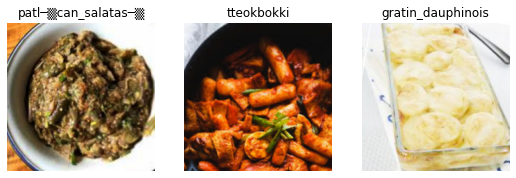

In [ ]:
dls.show_batch(nrows=1, ncols=3)

Each image should have the correct label above it.  

If there is a mistake in building your `DataBlock`, it likely won't be noticed before this step. To debug this, use the `summary` method. It will attempt to create a batch from the source you give it, with a lot of details. Also, if it fails, it will show at which point the error happens. 

For instance, one common mistake is to forget to use a `Resize` transform, so you end up with pictures of different sizes and are not able to batch them. Here is what the summary would look like in that case (note that the exact text may have changed since the time of writing, but it will give you an idea):

In [ ]:
#hide_output
food1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)'), 'name'))
food1.summary("/content/images/Images")

You can see exactly how the data was gathered and split, how the process went from a filename to a *sample* (the tuple (image, category)), then what item transforms were applied and how it failed to collate those samples in a batch (because of the different shapes). 


# Model Training

Train a simple model at this point, to diagnose whether the data needs domain-specific engineering, or reveal any other potential issues. 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


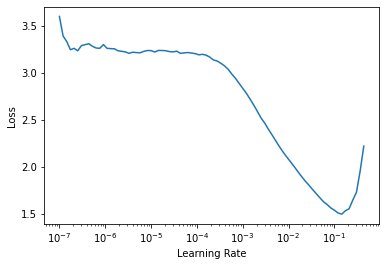

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.45e-02, steepest point: 2.09e-03


In [ ]:
top_5 = partial(top_k_accuracy, k=5)
learn = cnn_learner(dls, resnet34, metrics=[accuracy, top_5, error_rate])
learn.fit_one_cycle(4, 2e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,2.751369,1.415242,0.625000,0.958333,0.375000,00:13
1,1.700334,6.231091,0.333333,0.833333,0.666667,00:02
2,1.286258,8.765255,0.250000,0.791667,0.750000,00:02
3,1.014259,7.164510,0.250000,0.791667,0.750000,00:02


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, top_5, error_rate])
learn.fine_tune(2, base_lr=2.5e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,2.490215,1.702638,0.583333,0.958333,0.416667,00:02


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,0.707526,7.320887,0.416667,0.750000,0.583333,00:02
1,0.932233,10.717216,0.416667,0.791667,0.583333,00:02


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, top_5, error_rate])
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,3.258182,2.526150,0.250000,0.875000,0.750000,00:02


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,2.301959,1.730295,0.333333,0.875000,0.666667,00:02
1,1.947011,1.221570,0.541667,0.875000,0.458333,00:02
2,1.580908,1.116607,0.625000,0.916667,0.375000,00:02
3,1.274251,1.221679,0.541667,0.875000,0.458333,00:02
4,1.065329,1.291427,0.541667,0.916667,0.458333,00:02
5,0.897673,1.325906,0.541667,0.916667,0.458333,00:02


In [ ]:
learn.fit

<bound method Learner.fit of <fastai.learner.Learner object at 0x7f2778457250>>

The table shows the results after each epoch of training (after one complete pass through all of the images in the data.) The columns shown are the average loss over the items of the training set, the loss on the validation set, and any metrics requested—in this case, the error rate.

*loss* is the function chosen to optimize the parameters of our model. Fastai will generally try to select an appropriate loss function based on the data and model. In this case we have image data and a categorical outcome; fastai will default to using *cross-entropy loss*.

## Cross-Entropy Loss

*Cross-entropy loss* is a loss function that has two benefits:

- It works even when our dependent variable has more than two categories.
- It results in faster and more reliable training.


### Viewing Activations and Labels

View the activations of the model. To get a batch of real data from our `DataLoaders`, we can use the `one_batch` method:

In [ ]:
x,y = dls.one_batch()

This returns the dependent and independent variables, as a mini-batch. Let's examine what is contained in our dependent variable:

In [ ]:
y

TensorCategory([6, 2, 4, 0, 5, 0, 7, 6, 5, 4, 5, 6, 7, 1, 0, 3, 5, 1, 3, 0, 2, 5, 0, 3, 3, 6, 7, 5, 6, 7, 5, 1, 0, 3, 5, 4, 0, 2, 7, 5, 6, 5, 1, 1, 0, 2, 5, 5, 5, 3, 7, 0, 0, 2, 4, 1, 1, 3, 5, 2, 7, 3, 5, 2],
       device='cuda:0')

Our batch size is X, so we have X rows in this tensor. Each row is a single integer between 0 and 36, representing our XX possible pet breeds (categories of food). We can view the predictions (that is, the activations of the final layer of our neural network) using `Learner.get_preds`. This function either takes a dataset index (0 for train and 1 for valid) or an iterator of batches. Thus, we can pass it a simple list with our batch to get our predictions. It returns predictions and targets by default, but since we already have the targets, we can effectively ignore them by assigning to the special variable `_`:

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.3980e-05, 1.5194e-05, 3.3647e-05, 1.0417e-05, 2.7464e-04, 9.1790e-05, 9.9950e-01, 4.8251e-05])

The predictions are [number of categories] probabilities between 0 and 1, which add up to 1 in total:

In [ ]:
len(preds[0]),preds[0].sum()

(8, tensor(1.))

To transform the activations of our model into predictions, we used the *softmax* activation function.

## Model Interpretation

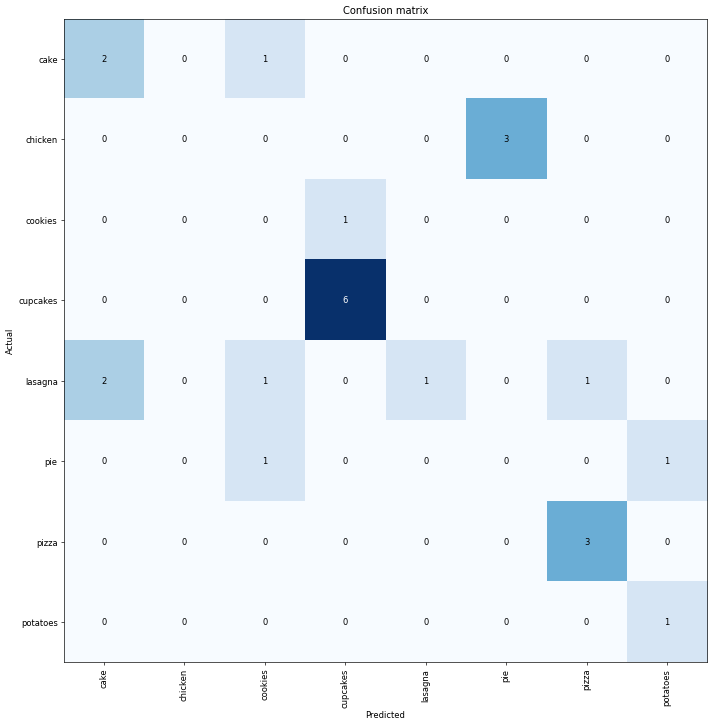

In [ ]:
# Confusion Matrix
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

The `most_confused` method shows the cells of the confusion matrix with the most incorrect predictions (here, with at least 5 or more):

In [ ]:
interp.most_confused(min_val=5)

[]

## Improving the Model

### Unfreezing and Transfer Learning

Pretrained models are trained on millions of data points (such as ImageNet), fine-tuned for a specific task. 

A convolutional neural network consists of many linear layers with a nonlinear activation function between each pair, followed by one or more final linear layers with an activation function such as softmax at the end. The final linear layer uses a matrix with the number columns such that the output size is equal to the number of classes in the model (for classification).

The final linear layer is unlikely to be useful when fine-tuning in a transfer learning setting, because it is specifically designed to classify the categories in the original pretraining dataset. So it is removed when doing transfer learning, and replaced with a linear layer with the correct number of outputs for the task.

This newly added linear layer has random weights; thus, our model prior to fine-tuning has random outputs. But, all layers prior to the last one are trained to be good at image classification in general. 

The challenge when fine-tuning is to replace the random weights in our added linear layers with weights that correctly achieve our desired task without breaking the carefully pretrained weights and the other layers. The do this, we want to train a model, but allow it to remember the useful aspects of the pretrained model, use them to solve our particular task, and only adjust them as required for the specifics of our case.

To do this, we allow the optimizer to only update the weights in the randomly added final layers ~ without changing the weights in the rest of the neural network at all. This is called *freezing* the pretrained layers.

When creating a model from a pretrained network fastai automatically freezes all of the pretrained layers. The FastAI `fine_tune` method does two things:

- Trains the randomly added layers for one epoch, with all other layers frozen
- Unfreezes all of the layers, and trains them all for the number of epochs requested

Although this is a reasonable default approach, it is likely that for any particular dataset, better results can be achieved by doing things slightly differently. The `fine_tune` method has a number of parameters to change its behavior.  However, it might be easiest to call the underlying methods directly to get custom behavior. Remember that you can see the source code for the method by using the following syntax:

    learn.fine_tune??

To do this manually, we train the randomly added layers for three epochs, using `fit_one_cycle`, which is the suggested way to train models without using `fine_tune`. 

`fit_one_cycle` starts training at a low learning rate, gradually increase it for the first section of training, and then gradually decrease it again for the last section of training.

In [ ]:
learn.fine_tune??

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, top_5, error_rate])
learn.fit_one_cycle(4,1.6e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,2.855947,3.467219,0.333333,0.958333,0.666667,00:02
1,1.693052,3.241510,0.625000,0.916667,0.375000,00:02
2,1.259158,3.401983,0.541667,0.875000,0.458333,00:02
3,1.056294,2.963754,0.583333,0.875000,0.416667,00:02


Then unfreeze the model:

In [ ]:
learn.unfreeze()

and run `lr_find` again, because having more layers to train, and weights that have already been trained for three epochs, means our previously found learning rate isn't appropriate any more:

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.3182567499825382e-06)

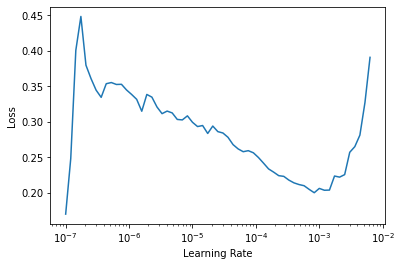

In [ ]:
learn.lr_find()

Note that the graph is a little different from when we had random weights: we don't have that sharp descent that indicates the model is training. That's because our model has been trained already. Here we have a somewhat flat area before a sharp increase, and we should take a point well before that sharp increase—for instance, 1e-5. The point with the maximum gradient isn't what we look for here and should be ignored.


In [ ]:
learn.fit_one_cycle(6, lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,0.445199,2.316880,0.541667,0.875000,0.458333,00:02
1,0.366289,1.807548,0.583333,0.958333,0.416667,00:02
2,0.318495,1.633839,0.708333,0.916667,0.291667,00:02
3,0.253072,1.669979,0.666667,0.916667,0.333333,00:02
4,0.208088,1.723668,0.666667,0.916667,0.333333,00:02
5,0.181307,1.768338,0.666667,0.916667,0.333333,00:02


This has improved our model a bit.  But there's more we can do. 

### Discriminative Learning Rates

The deepest layers of our pretrained model might not need as high a learning rate as the last ones, so we should probably use different learning rates for those—this is known as using *discriminative learning rates*.

Even after we unfreeze, we still care a lot about the quality of the pretrained weights. We would not expect that the best learning rate for those pretrained parameters would be as high as for the randomly added parameters, even after we have tuned those randomly added parameters for a few epochs. Remember, the pretrained weights have been trained for hundreds of epochs, on millions of images.

Recall that the first layer learns simple foundations, like edge and gradient detectors; these are likely to be just as useful for nearly any task. The later layers learn more complex concepts, like "eye" and "sunset," which might not be useful. Thus, it makes sense to let the later layers fine-tune more quickly than earlier layers.

Therefore, fastai's default approach is to use discriminative learning rates. This uses a lower learning rate for the early layers of the neural network, and a higher learning rate for the later layers (and especially the randomly added layers). 

<img alt="Impact of different layers and training methods on transfer learning (Yosinski)" width="680" caption="Impact of different layers and training methods on transfer learning (courtesy of Jason Yosinski et al.)" id="yosinski" src="https://github.com/fastai/fastbook/blob/master/images/att_00039.png?raw=1">

fastai lets you pass a Python `slice` object anywhere that a learning rate is expected. The first value passed will be the learning rate in the earliest layer of the neural network, and the second value will be the learning rate in the final layer. The layers in between will have learning rates that are multiplicatively equidistant throughout that range. 

Let's use this approach to replicate the previous training, but this time we'll only set the *lowest* layer of our net to a learning rate of 1e-6; the other layers will scale up to 1e-3. 

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, top_5, error_rate])
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,3.207763,2.497817,0.250000,0.833333,0.750000,00:02
1,2.348801,1.319982,0.541667,1.000000,0.458333,00:02
2,1.718764,1.191592,0.458333,1.000000,0.541667,00:02


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,0.515065,1.332160,0.416667,0.958333,0.583333,00:02
1,0.508902,1.405458,0.458333,0.958333,0.541667,00:02
2,0.472867,1.519004,0.458333,0.958333,0.541667,00:02
3,0.429924,1.538464,0.541667,1.000000,0.458333,00:02
4,0.388903,1.665097,0.541667,0.833333,0.458333,00:02
5,0.350431,1.735678,0.500000,0.833333,0.500000,00:02
6,0.309084,1.795126,0.458333,0.791667,0.541667,00:02
7,0.280612,1.826718,0.500000,0.791667,0.500000,00:02
8,0.255773,1.821856,0.500000,0.791667,0.500000,00:02
9,0.237852,1.802121,0.458333,0.833333,0.541667,00:02


fastai can show us a graph of the training and validation loss:

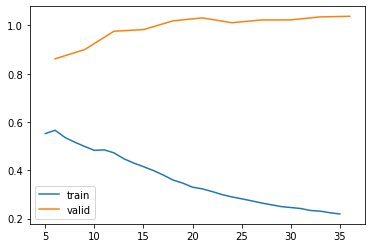

In [ ]:
learn.recorder.plot_loss()

As you can see, the training loss keeps getting better and better. But notice that eventually the validation loss improvement slows. This is the point at which the model is starting to over fit. 

Look at the table of training results per epoch, and you will often see that the accuracy continues improving, even as the validation loss gets worse. In the end what matters is accuracy, or more generally your chosen metrics, not the loss. The loss is just the function the computer uses to help us to optimize.

Another decision you have to make when training the model is for how long to train for. 

### Selecting the Number of Epochs

Often researchers are limited by time, rather than generalization and accuracy, when choosing how many epochs to train for. So your first approach to training should be to simply pick a number of epochs that will train in the amount of time that you are happy to wait for. Then look at the training and validation loss plots, as shown above, and in particular your metrics, and if you see that they are still getting better even in your final epochs, then you know that you have not trained for too long.

On the other hand, you may well see that the metrics you have chosen are really getting worse at the end of training. Remember, it's not just that we're looking for the validation loss to get worse, but the actual metrics. Your validation loss will first get worse during training because the model gets overconfident, and only later will get worse because it is incorrectly memorizing the data. We only care in practice about the latter issue. Remember, our loss function is just something that we use to allow our optimizer to have something it can differentiate and optimize; it's not actually the thing we care about in practice.

Before the days of 1cycle training it was very common to save the model at the end of each epoch, and then select whichever model had the best accuracy out of all of the models saved in each epoch. This is known as *early stopping*. However, this is very unlikely to give you the best answer, because those epochs in the middle occur before the learning rate has had a chance to reach the small values, where it can really find the best result. Therefore, if you find that you have overfit, what you should actually do is retrain your model from scratch, and this time select a total number of epochs based on where your previous best results were found.

If you have the time to train for more epochs, you may want to instead use that time to train more parameters—that is, use a deeper architecture.

### Deeper Architectures

In general, a model with more parameters can model your data more accurately; a bigger model will better capture the real underlying relationships in the data, and also to capture and memorize the specific details of individual images.

You can't really know ahead of time what the best architecture for your particular problem is—you need to try training some. 

Let's try a ResNet-50 now with mixed precision:

In [ ]:
from fastai.callback.fp16 import *
#learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn = cnn_learner(dls, resnet50, metrics=[accuracy, top_5, error_rate]).to_fp16()
learn.fine_tune(8, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,3.162923,3.216835,0.083333,0.750000,0.916667,00:02
1,2.452655,1.729120,0.500000,0.750000,0.500000,00:02
2,1.757772,1.516623,0.625000,0.958333,0.375000,00:02


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,error_rate,time
0,0.308239,1.500932,0.625000,0.916667,0.375000,00:02
1,0.259444,1.462448,0.541667,0.875000,0.458333,00:02
2,0.219431,1.768842,0.541667,0.916667,0.458333,00:02
3,0.197556,2.082318,0.625000,0.958333,0.375000,00:02
4,0.173258,2.271458,0.583333,0.958333,0.416667,00:02
5,0.151107,2.295313,0.583333,0.916667,0.416667,00:02
6,0.139938,2.277075,0.583333,0.916667,0.416667,00:02
7,0.125995,2.273933,0.583333,0.875000,0.416667,00:02


You'll see here we've gone back to using `fine_tune`, since it's so handy! We can pass `freeze_epochs` to tell fastai how many epochs to train for while frozen. It will automatically change learning rates appropriately for most datasets.

In this case, we're not seeing a clear win from the deeper model. This is useful to remember—bigger models aren't necessarily better models for your particular case! Make sure you try small models before you start scaling up.